In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/class_star.csv")

In [4]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [5]:
df.tail()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Blue,O
237,8829,537493.0,1423.0,-10.73,5,White,A
238,9235,404940.0,1112.0,-11.23,5,White,A
239,37882,294903.0,1783.0,-7.80,5,Blue,O


In [6]:
df.columns


Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [7]:
df['Star type'].shape

(240,)

In [8]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [9]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


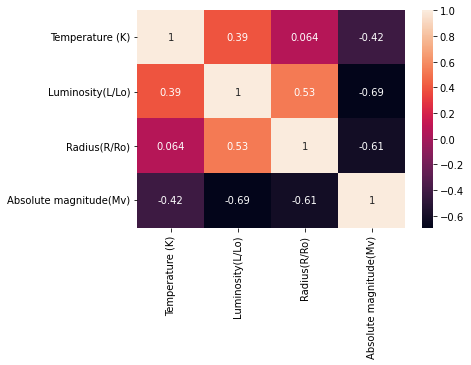

In [10]:
sns.heatmap(df.loc[:, df.columns != 'Star type'].corr(), annot=True)

In [11]:
X=df.drop(['Star type', 'Star color','Spectral Class'], axis=1)
y = df['Star type']
X.shape
y.shape

(240,)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()


model.add(Dense(40, activation='relu')) #input
model.add(Dense(40, activation='relu')) #hidden
model.add(Dense(40, activation='relu')) #hidden
model.add(Dense(40, activation='relu')) #output

model.add(Dense(1))  #car prediction d une classe 

model.compile(optimizer='adam', loss='mse')

In [19]:
#epochs_hist = model.fit(x= X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)
epochs_hist = model.fit(X_train, y_train, epochs=400, batch_size=75 ,verbose=1, validation_split=0.3)

Epoch 1/400
2/2 [==============================] - 1s 142ms/step - loss: 9.6504 - val_loss: 8.6880
Epoch 2/400
2/2 [==============================] - 0s 19ms/step - loss: 9.2478 - val_loss: 8.3387
Epoch 3/400
2/2 [==============================] - 0s 25ms/step - loss: 8.8719 - val_loss: 8.0197
Epoch 4/400
2/2 [==============================] - 0s 23ms/step - loss: 8.5237 - val_loss: 7.7129
Epoch 5/400
2/2 [==============================] - 0s 18ms/step - loss: 8.1944 - val_loss: 7.4200
Epoch 6/400
2/2 [==============================] - 0s 19ms/step - loss: 7.8637 - val_loss: 7.1110
Epoch 7/400
2/2 [==============================] - 0s 18ms/step - loss: 7.5097 - val_loss: 6.7860
Epoch 8/400
2/2 [==============================] - 0s 20ms/step - loss: 7.1544 - val_loss: 6.4507
Epoch 9/400
2/2 [==============================] - 0s 18ms/step - loss: 6.7727 - val_loss: 6.1031
Epoch 10/400
2/2 [==============================] - 0s 16ms/step - loss: 6.3649 - val_loss: 5.7382
Epoch 11/400
2/2 [

## Evaluation of the model

In [20]:
epochs_hist.history.keys()


dict_keys(['loss', 'val_loss'])

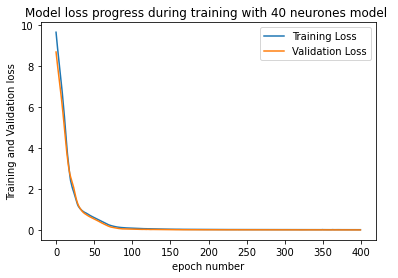

In [21]:
import matplotlib.pyplot as plt
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training with 40 neurones model ')
plt.xlabel('epoch number')
plt.ylabel('Training and Validation loss')
plt.legend(['Training Loss', 'Validation Loss'])

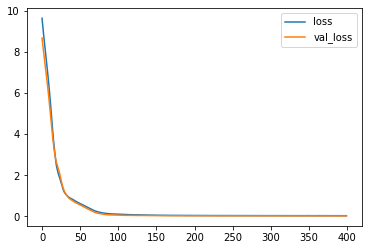

In [22]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [24]:
predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)

0.025178172157906256

In [25]:
mean_absolute_error(y_test, predictions)

0.11127184703946114

In [26]:
df['Star type'].describe()

count    240.000000
mean       2.500000
std        1.711394
min        0.000000
25%        1.000000
50%        2.500000
75%        4.000000
max        5.000000
Name: Star type, dtype: float64

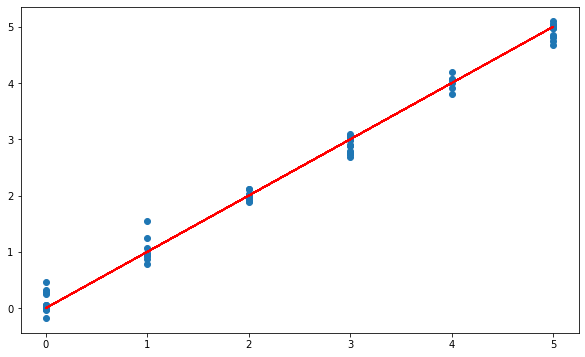

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test,'r')